<a href="https://colab.research.google.com/github/byiringiroscar/NLP_FELLOWSHIP/blob/main/Oscar_Byiringiro_2nd_Hackathon_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

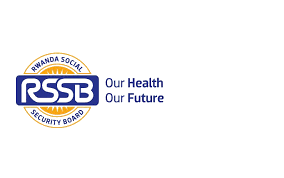

Chatbot for RSSB

#Aims of this hackathon is

1.   build government chatbot
2.   display it in UI
3.   Add external functionality to make it better



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
#Fetch the content from the front page
url_links = 'https://www.rssb.rw/'
content = requests.get(url_links).content

In [ ]:
#Initiating the BS4 parser
page = BeautifulSoup(content, 'html.parser')

#here we are going to store all content we have on first page

##  use package of pysummarization to summarize our 'p' content

In [ ]:
!pip install pysummarization # installation of package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for pysummarization: filename=pysummarization-1.1.9-py3-none-any.whl size=82376 sha256=dbdf9b01837045c855d5b3e23b1b642eef35590940d4eb36dfe1b37709fb65ce
  Stored in directory: /root/.cache/pip/wheels/b5/28/29/9bad07ea24d08ecc60fc05419196e0e2506dc1e0eb121b0d31
Successfully built pysummarization


In [ ]:
# here is import which help us to summarize description
from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor
# ================ function which help us to summarize word ========================
def summarize_description(document):
  # Object of automatic summarization.
  auto_abstractor = AutoAbstractor()
  # Set tokenizer.
  auto_abstractor.tokenizable_doc = SimpleTokenizer()
  # Set delimiter for making a list of sentence.
  auto_abstractor.delimiter_list = [".", "\n"]
  # Object of abstracting and filtering document.
  abstractable_doc = TopNRankAbstractor()
  # Summarize document.
  result_dict = auto_abstractor.summarize(document, abstractable_doc)
  final_text_summarized = ''
  # Output result.
  for sentence in result_dict["summarize_result"]:
      final_text_summarized += sentence
  return final_text_summarized

get content in our landing page paragraph

In [ ]:
landing_page_p = page.find_all('p') # p means paragraph
landing_page_h = page.find_all('h2') # h means header

this function will help us to split our string into to 60 string

In [ ]:
def split_string(page_content):
  n = 60
  chunks = [page_content[i:i+n] for i in range(0, len(page_content), n)]
  return chunks

save data in list with split them and use pysummarization

In [ ]:
# loop the data then save it in list with help
page_landing_links_p = [] # links related with first content of page landing p tag
page_landing_text_p = [] # content related with first content of page landing p tag
for land_page_p in landing_page_p:
  p_content = land_page_p.text
  split_content_p = split_string(p_content)
  for content_p in split_content_p:
      new_content_land = summarize_description(content_p) # append content in landing page
      if new_content_land not in page_landing_text_p and len(new_content_land) >0:
        page_landing_text_p.append(new_content_land)
        page_landing_links_p.append(url_links)


In [ ]:
len(page_landing_text_p)

38

get content in our landing page header

In [ ]:
# loop the data then save it in list with help
page_landing_links_h = [] # links related with first content of page landing h2
page_landing_text_h = [] # content related with first content of page landing h2
for land_page_p in landing_page_h:
  p_content = land_page_p.text
  split_content_p = split_string(p_content)
  for content_p in split_content_p:
    new_content_land = summarize_description(content_p) # append content in landing page
    if new_content_land not in page_landing_text_h and len(new_content_land) >0:
      page_landing_text_h.append(new_content_land)
      page_landing_links_h.append(url_links)

In [ ]:
# list for data of p in landing page
#list page_landing_links_p # links related with first content of page landing p tag
#list page_landing_text_p # content related with first content of page landing p tag
# list for data of h2 in landing page
#list page_landing_links_h  # links related with first content of page landing h2
#list page_landing_text_h # content related with first content of page landing h2

In [ ]:
# extend all list
page_landing_text_p.extend(page_landing_text_h)
page_landing_links_p.extend(page_landing_links_h)



save our final data for landing page

In [ ]:
# final list of data for landing page
final_content_landing = page_landing_text_p.copy()
final_links_landing = page_landing_links_p.copy()

get all links in page page landing

In [ ]:
#Get all the links in the website
links = page.find_all('a')

loop to all links then get text on it and link it's self

In [ ]:
# main links fetching and main titles
list_of_links = [] #list()
list_of_titles = []

for item in links: #loop over the list of links
  if not str(item['href']) == '/':
    if len(item.text) > 0:
        if not item['href'].endswith('docx') and not item['href'].endswith('pdf') and not item['href'].endswith('xl') and not item['href'].endswith('xlsx') and not item['href'].endswith('html') and not item['href'].endswith('gov') and not item['href'].endswith('doc') and not item['href'].endswith('zip') and not item['href'].endswith('mdb') and not item['href'].endswith('xls'):
          if str(item['href']).startswith('http'):
            if bool(re.search('rssb', str(item['href']))):
              if item.text not in list_of_titles and len(item.text)>0:
                lin = str(item['href'])
                list_of_links.append(lin)
                list_of_titles.append(item.text)

          else:
            if item.text not in list_of_titles and len(item.text)>0:
              lin = str(item['href'])
              domain = 'https://www.rssb.rw' + lin
              list_of_links.append(domain)
              list_of_titles.append(item.text)






get all links in each link and content on it

In [ ]:
# take every link then go inside then get all links associated with it
def get_individual_link(fina_l):
  try:
    if not fina_l.endswith('docx') and not fina_l.endswith('pdf') and not fina_l.endswith('xl') and not fina_l.endswith('xlsx') and not fina_l.endswith('html') and not fina_l.endswith('gov') and not fina_l.endswith('doc') and not fina_l.endswith('zip') and not fina_l.endswith('mdb') and not fina_l.endswith('xls'):
      content_individual_link = requests.get(fina_l).content # get content for each link
      page_individual_link = BeautifulSoup(content_individual_link, 'html.parser', from_encoding="iso-8859-1")
      final_link_individual = page_individual_link.findAll('a')
      for links_ind in final_link_individual:
        if not str(links_ind['href']) == '/':
          if len(links_ind.text) > 0:
            if str(links_ind['href']).startswith('http'):
              if bool(re.search('rssb', str(links_ind['href']))):
                if not links_ind['href'].endswith('docx') and not links_ind['href'].endswith('pdf') and not links_ind['href'].endswith('xl') and not links_ind['href'].endswith('xlsx') and not links_ind['href'].endswith('html') and not links_ind['href'].endswith('gov') and not links_ind['href'].endswith('doc') and not links_ind['href'].endswith('zip') and not links_ind['href'].endswith('mdb') and not links_ind['href'].endswith('xls'):
                  if links_ind.text not in list_of_titles and len(links_ind.text) > 0:
                    lin = str(links_ind['href'])
                    list_of_links.append(lin)
                    list_of_titles.append(links_ind.text)
            else:
              if links_ind.text not in list_of_titles and len(links_ind.text) > 0:
                lin = str(links_ind['href'])
                domain = 'https://www.rssb.rw' + lin
                list_of_links.append(domain)
                list_of_titles.append(links_ind.text)
  except:
    pass



In [ ]:
for i in range(len(list_of_links)):
  fina_links = list_of_links[i]
  fin_li_official = get_individual_link(fina_links)

In [ ]:
len(list_of_titles)

57

In [ ]:
def get_content_link_rssb_links(link_rssb):
  try:
      content_rssb = requests.get(link_rssb).content
      page_rssb = BeautifulSoup(content_rssb, 'html.parser')
      links_rssb = page_rssb.find_all('p')
      links_rssb_h_tag = page_rssb.find_all('h2')
      if len(links_rssb) > 0:
        for links_rssb in links_rssb:
          links_rssb = links_rssb.text
          new_list_content = split_string(links_rssb)
          for new_cont in new_list_content:
            if new_cont not in list_of_titles and len(new_cont)> 0:
              list_of_titles.append(new_cont)
              list_of_links.append(link_rssb)
      if len(links_rssb_h_tag) > 0:
        for links_rssb_h_tag in links_rssb_h_tag:
          if links_rssb_h_tag.text not in list_of_titles:
            content_header = links_rssb_h_tag.text.strip()
            list_of_titles.append(content_header)
            list_of_links.append(link_rssb)
  except:
    pass

In [ ]:
for index, lin_rssb in enumerate(list_of_links):
    try:
      get_content_link_rssb_links(lin_rssb)
    except:
      pass


In [ ]:
len(list_of_titles)
len(list_of_links)

882

In [ ]:
print(len(final_content_landing))
print(len(final_links_landing))

41
41


extend these list of all data and data from our landing page

In [ ]:
list_of_titles.extend(final_content_landing)
list_of_links.extend(final_links_landing)

In [ ]:
len(list_of_titles)
len(list_of_links)

923

In [ ]:
df = pd.DataFrame()
df['title'] = list_of_titles
df['link'] = list_of_links

In [ ]:
df.describe()

,title,link
count,923,923
unique,923,36
top,schemes,https://www.rssb.rw/rssb-embarks-on-a-new-five...
freq,1,93


In [ ]:
#Drop all the row with empty title columns
df = df.dropna()

In [ ]:
df.describe()

,title,link
count,923,923
unique,923,36
top,schemes,https://www.rssb.rw/rssb-embarks-on-a-new-five...
freq,1,93


In [ ]:
df.drop_duplicates(inplace=True, subset='title')

In [ ]:
df.describe()

,title,link
count,923,923
unique,923,36
top,schemes,https://www.rssb.rw/rssb-embarks-on-a-new-five...
freq,1,93


In [ ]:
df

,title,link
0,schemes,https://www.rssb.rw/#schemes
1,investment,https://www.rssb.rw/investment
2,management,https://www.rssb.rw/management
3,about,https://www.rssb.rw/aboutus
4,careers,https://www.rssb.rw/careers
...,...,...
918,r employees who were killed during the 1994 Ge...,https://www.rssb.rw/
919,the Tutsi.\n The event was orga.\n,https://www.rssb.rw/
920,Optimistic and forward-looking agent of centra...,https://www.rssb.rw/
921,working to achieve the financial security and ...,https://www.rssb.rw/


In [ ]:
#Check whehter the link is full formated link
is_full_link = df.link.str.startswith('http')

#Check whether the link is pdf documents
is_pdf = df.link.str.contains('.pdf')

In [ ]:
# data cleaning in dataframe
import re

def preprocessing(titles : list):
  cleaned_titles = []
  for title in titles:
    title = summarize_description(title.strip()) # here we are summarizing and removing unwanted data
    title = title.lower()
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    html_pattern = re.compile('<.*?>')
    title = url_pattern.sub(r'', title)
    title = html_pattern.sub(r'', title)
    title = re.sub(r"[^\w\d'\s]+", ' ', title)
    cleaned_titles.append(title)
  return cleaned_titles


df['title'] = preprocessing(df['title'])

# Start Building the chatbot

## Building the intent file

In [ ]:
question = """Guide me to {}?
Where do you get {}?
what about {}?
how is it {}?
What is the link to the {}?
How do you get {}?
Who is in Charge of {}?
how can I get {}?
which way to get {}?
I need to get {}?
direct me to {}
please how can I {}?
I need to know more related with {}?
how can someone {}?
I need direction to {}?
{}"""

answers = """Here is the link {}.
You can use this link {} for more information.
thanks for contacting use this {} for more detail.
ok try this {} for more information.
take a look on this {}.
check out on this link {} for more detail."""

In [ ]:
# code for directory permanent
# import shutil

# shutil.rmtree('/content/pytorch-chatbot')

In [ ]:
!git clone https://github.com/patrickloeber/pytorch-chatbot.git

Cloning into 'pytorch-chatbot'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 41 (delta 11), reused 8 (delta 8), pack-reused 23
Unpacking objects: 100% (41/41), done.


In [ ]:
import json
with open('/content/pytorch-chatbot/intents.json', 'r') as intent_file:
  intents__ = json.load(intent_file)

In [ ]:
greet_intents = []
for intet in intents__['intents']:
  greet_intents.append(intet)


save data in intents in order to be used in bow and tokenization and even our model

In [ ]:
intents = []

for index in range(len(df)):
  intent = {}
  tag = df.iloc[index]['title']
  intent['tag'] = tag
  intent['patterns'] = list()
  intent['responses'] = list()
  # intent['responses'] = [f'You can use this link {df.iloc[index].link} for more information']
  for i in range(len(question.split('\n'))):
    intent['patterns'].append(question.split('\n')[i].format(intent['tag']))
  for i in range(len(answers.split('\n'))):
    intent['responses'].append(answers.split('\n')[i].format(df.iloc[index].link))

  intents.append(intent)

In [ ]:
intents.extend(greet_intents)

In [ ]:
file = {'intents': intents}
file

{'intents': [{'tag': '',
   'patterns': ['Guide me to ?',
    'Where do you get ?',
    'what about ?',
    'how is it ?',
    'What is the link to the ?',
    'How do you get ?',
    'Who is in Charge of ?',
    'how can I get ?',
    'which way to get ?',
    'I need to get ?',
    'direct me to ',
    'please how can I ?',
    'I need to know more related with ?',
    'how can someone ?',
    'I need direction to ?',
    ''],
   'responses': ['Here is the link https://www.rssb.rw/#schemes.',
    'You can use this link https://www.rssb.rw/#schemes for more information.',
    'thanks for contacting use this https://www.rssb.rw/#schemes for more detail.',
    'ok try this https://www.rssb.rw/#schemes for more information.',
    'take a look on this https://www.rssb.rw/#schemes.',
    'check out on this link https://www.rssb.rw/#schemes for more detail.']},
  {'tag': '',
   'patterns': ['Guide me to ?',
    'Where do you get ?',
    'what about ?',
    'how is it ?',
    'What is the li

In [ ]:
import json

with open('/content/pytorch-chatbot/intents.json', 'w+') as intent_file:
  intent_file.seek(0)
  intent_file.truncate()
  json.dump(file, intent_file)

In [ ]:
%cd pytorch-chatbot/

/content/pytorch-chatbot


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# train our model

In [ ]:
!python train.py

## PART FOR SAVING THE TEXT WHICH RETURN NOT UNDERSTANDING

*   Here I will using mongodb as online db
*   save data in our db  
*   use threading to help the client not to wait much and even run in background







In [ ]:
# install pymongo for help us in collaboration with mongodb
!pip install pymongo

In [ ]:
#initialize mongo db and use it with creating connection with it
import pymongo
from urllib.parse import quote_plus
from pymongo import MongoClient
username = quote_plus('admin')
password = quote_plus('Admin123')
cluster = 'Cluster0'
# authSource = '<authSource>'
# authMechanism = '<authMechanism>'
uri = 'mongodb+srv://' + username + ':'+ password + '@cluster0.pbhtn9t.mongodb.net/?retryWrites=true&w=majority'

In [ ]:
# initialize our connection
client = MongoClient(uri)
db = client.test
# connect to our db name rssb_company
db = client['rssb_company']
# connect to our db table rssb_review
collection = db['rssb_review']

In [ ]:
# count all data we have
collection.count_documents({})

In [ ]:
# create function to save the message comes go to use that telling user that we don't understand meaning of what he said
def save_message_db(message_user):
  # insert only one data by using insert_one
  collection.insert_one({"message": message_user})

use our model that trained

In [ ]:
import random
import json
import threading

import torch

from model import NeuralNet
from nltk_utils import bag_of_words, tokenize

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open('intents.json', 'r') as json_data:
    intents = json.load(json_data)

FILE = "data.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

bot_name = "Oscar"
print("Let's chat! (type 'quit' to exit)")

def query(question : str):
  # sentence = "do you use credit cards?"
  sentence = question

  sentence = tokenize(sentence)
  X = bag_of_words(sentence, all_words)
  X = X.reshape(1, X.shape[0])
  X = torch.from_numpy(X).to(device)

  output = model(X)
  _, predicted = torch.max(output, dim=1)

  tag = tags[predicted.item()]

  probs = torch.softmax(output, dim=1)
  prob = probs[0][predicted.item()]
  if prob.item() > 0.75:
      for intent in intents['intents']:
          if tag == intent["tag"]:
              return f"{bot_name}: {random.choice(intent['responses'])}"
  else:
    x = threading.Thread(target=save_message_db, args=(question,))
    x.start()
    return f"{bot_name}: I do not understand..."

In [ ]:
response = query('hello there xdssdsdsdclsdsd')

In [ ]:
response

### setup language detection Api

In [ ]:
!pip install detectlanguage

initialize and use detectlanguage package by using detect language api

In [ ]:
import detectlanguage

detectlanguage.configuration.api_key = "590ae4dbc1cce997e61dc9d1841e9fce"

# Enable secure mode (SSL) if you are passing sensitive data
detectlanguage.configuration.secure = True

create function to detect our langauge

In [ ]:
def detect_lang_text(text_to_detect):
  text_detect = detectlanguage.detect(text_to_detect)
  text_lang = ''
  text_conf = 0
  text_isReliable = False
  for t in text_detect:
    if t['confidence'] > text_conf and t['isReliable'] == True:
      text_lang = t['language']
      text_conf = t['confidence']
      text_isReliable = t['isReliable']
  return text_lang

In [ ]:
!pip install langdetect # this is only we help us to translate our text as have some weakeness in translation

In [ ]:

import requests
import json


class translator:
    api_url = "https://translate.googleapis.com/translate_a/single"
    client = "?client=gtx&dt=t"
    dt = "&dt=t"

    #fROM English to Kinyarwanda
    def translate(text : str , target_lang : str, source_lang : str):
        sl = f"&sl={source_lang}"
        tl = f"&tl={target_lang}"
        r = requests.get(translator.api_url+ translator.client + translator.dt + sl + tl + "&q=" + text)
        return json.loads(r.text)[0][0][0]

In [ ]:
resp = translator.translate(text='Mpereza amakuru yerekeye oscar', target_lang='fr', source_lang='rw')

In [ ]:
resp

In [ ]:
from langdetect import detect
def process_question(text : str):
  source_lang = detect_lang_text(text)
  if len(source_lang) > 0:
    resp = translator.translate(text=text, target_lang='en', source_lang=source_lang)
    return resp, source_lang
  else:
    source_lang = detect(text)
    resp = translator.translate(text=text, target_lang='en', source_lang=source_lang)
    return resp, source_lang

def process_answer(text : str, source_lang):
  resp = translator.translate(text=text, target_lang=source_lang, source_lang='en')
  return resp

In [ ]:
def process(QUESTION: str):
  USER_QUERY, SL = process_question(QUESTION) #Translate the original question into english and store the source lang
  RESPONSE = query(USER_QUERY) #Asking th chatbot question
  ORIGINAL_RESPONSE = process_answer(RESPONSE, SL)
  return ORIGINAL_RESPONSE
a = 'hello there'
process(a.lower())

#FAST API

In [ ]:
!pip install fastapi pyngrok uvicorn nest-asyncio

In [ ]:
!ngrok authtoken 2HJTD4eU4nX4kqE0VD1YVDlysnq_4pvNxMFU5pe3Q4ERkSeHP

In [ ]:
from fastapi import FastAPI, Request
from fastapi.responses import HTMLResponse
from IPython.core.interactiveshell import asyncio
import uvicorn
from fastapi.templating import Jinja2Templates
from fastapi.staticfiles import StaticFiles
from fastapi.middleware.cors import CORSMiddleware
import schemas
app = FastAPI()
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

templates = Jinja2Templates(directory='/content/templates')
app.mount("/content/static", StaticFiles(directory="/content/static"), name="static")



@app.get('/', response_class=HTMLResponse)
def home(request: Request):
    return templates.TemplateResponse("base.html", {"request": request})
@app.post("/predict")
async def predict(item: schemas.Item):
    response = process(item.message)
    message = {"answer": response}
    return message






In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8000)
print("REST API started")
print("Your public API URL:", ngrok_tunnel.public_url)
print("You can for example open the following URL in your browser: {}?target_lang=en&text=Hallo%20Welt".format(ngrok_tunnel.public_url))

nest_asyncio.apply()
uvicorn.run(app, port=8000)